In [49]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
from math import pi
%matplotlib inline

       ┌─────────┐ ░            ░      ┌───┐ ░ ┌─┐    ░               
   q0: ┤ Rx(π/3) ├─░────────────░───■──┤ H ├─░─┤M├────░───────────────
       └─────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░               
   q1: ────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───────────────
                   ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
   q2: ────────────░──────┤ X ├─░────────────░──╫──╫──░──┤ X ├──┤ Z ├─
                   ░      └───┘ ░            ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
                                                ║  ║       ║   ┌──╨──┐
crz: 1/═════════════════════════════════════════╩══╬═══════╬═══╡ 0x1 ╞
                                                0  ║    ┌──╨──┐└─────┘
crx: 1/════════════════════════════════════════════╩════╡ 0x1 ╞═══════
                                                   0    └─────┘       


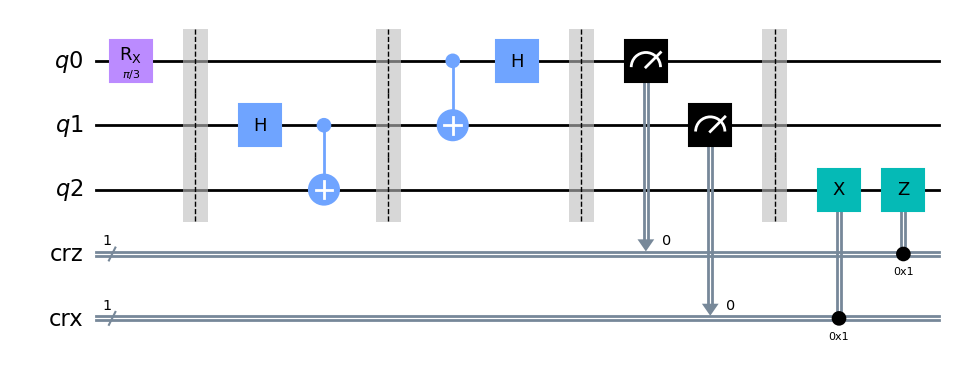

In [50]:
# Initialize 3 qubits circuit.
q0 = QuantumRegister(1, name = "q0") # The source quantum state qubit we want to teleport.
q1 = QuantumRegister(1, name = "q1") # The entanglement qubit for both q0 and q2.
q2 = QuantumRegister(1, name = "q2") # The destination qubit.

crz = ClassicalRegister(1, name = "crz") # Measurement of the source qubit q0.
crx = ClassicalRegister(1, name = "crx") # Measurement of q1.

circuit = QuantumCircuit(q0, q1, q2, crz, crx) # Quantum Circuit with 3 qubits.

# Initialize q0, the quantum state we want to teleport.
#circuit.x(0)
circuit.rx(pi/3, q0) # Apply the X-Rotation gate, arbitrary rotation, to put q0 into a super-positioned state.
circuit.barrier() # Ensure all the operations are completed, before continuing beyond the barrier.

# Create Bell state pair (entanglement).
circuit.h(q1) # Apply the Hadamard gate.
circuit.cnot(q1, q2) # Apply the CNOT gate.
circuit.barrier()

# Peform Bell state measurement.
circuit.cnot(q0, q1)
circuit.h(q0)
circuit.barrier()
circuit.measure(q0, crz)
circuit.measure(q1, crx)
circuit.barrier()

# Transform the destination qubit q2, to match the q0 quantum state.
circuit.x(q2).c_if(crx, 1) # Apply the Pauli-X gate if crx = 1.
circuit.z(q2).c_if(crz, 1) # Apply the Pauli-Z gate if crz = 1.

print(circuit)
circuit.draw(output = 'mpl') # Draw the circuit diagram.

In [51]:
simulator = Aer.get_backend('statevector_simulator') # Simulate the QC execution.
result = execute(circuit, backend=simulator).result()
state_vector = result.get_statevector()
array_to_latex(state_vector, prefix="\\text{State Vector = }\n") # Visual representation of the vector.

<IPython.core.display.Latex object>

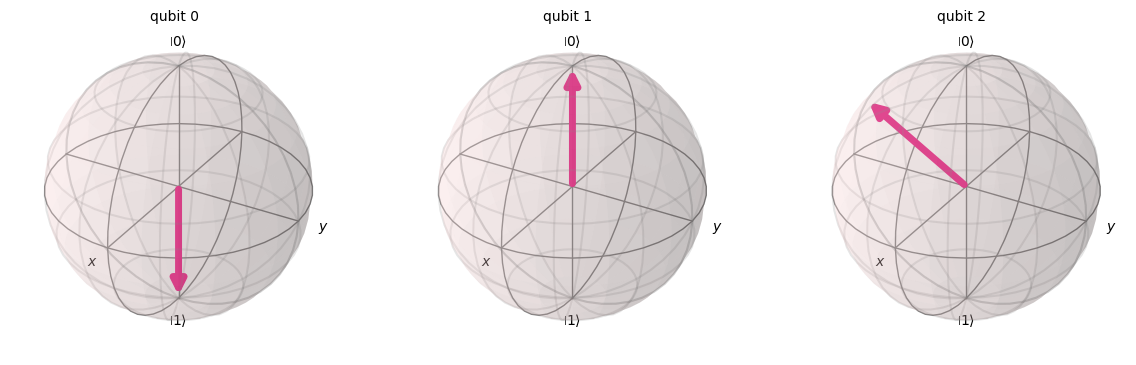

In [52]:
plot_bloch_multivector(state_vector) # Vector visualization on the bloch sphere.

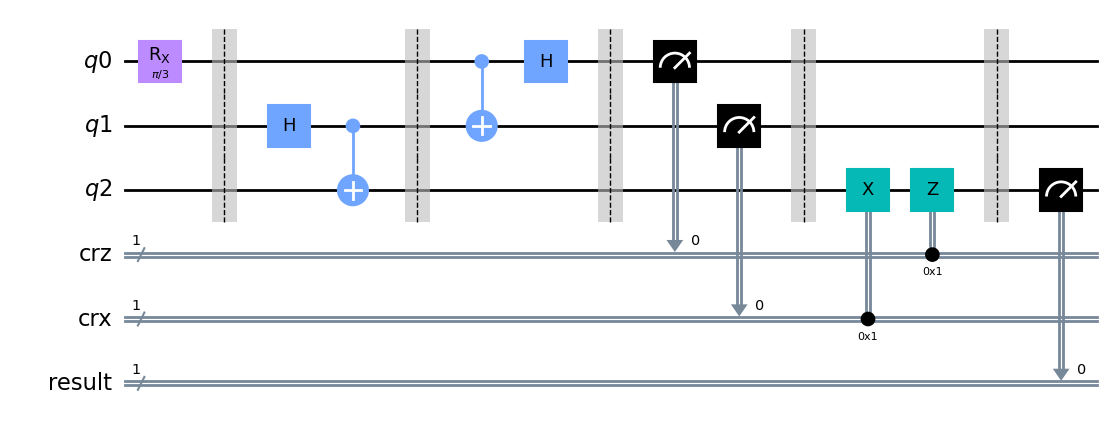

In [53]:
# Measure q2.
cr_result = ClassicalRegister(1, name = "result")
circuit.barrier()
circuit.add_register(cr_result)
circuit.measure(2, 2)
circuit.draw(output='mpl')  # Draw the circuit diagram.

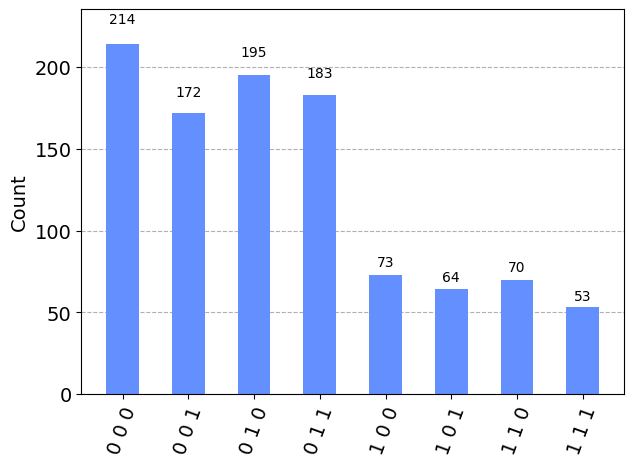

In [54]:
# Simulate the execution of QC.
# QASM = Quantum Assembly Language.
simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend=simulator).result()
counts = result.get_counts()
plot_histogram(counts)